In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [3]:
BTC_Ticker = yf.Ticker("BTC-USD")
BTC_Data = BTC_Ticker.history(period="max")

In [4]:
close_price_bitcoin = BTC_Data["Close"].to_numpy()
close_price_bitcoin_nohead = close_price_bitcoin[1:]
close_price_bitcoin_notail = close_price_bitcoin[:len(close_price_bitcoin) - 1]

bitcoin_volatility = (close_price_bitcoin_nohead/close_price_bitcoin_notail - 1)
bitcoin_std = np.std(bitcoin_volatility)*np.sqrt(365)

bitcoin_ror = ((close_price_bitcoin_nohead - close_price_bitcoin_notail)/close_price_bitcoin_notail)
expected_return_bitcoin = np.mean(bitcoin_ror)*365

In [5]:
one_ticker = yf.Ticker("ONE1-USD")
one_data = one_ticker.history(period="max")

In [6]:
close_price_one = one_data["Close"].to_numpy()
close_price_one_nohead = close_price_one[1:]
close_price_one_notail = close_price_one[:len(close_price_one) - 1]
one_volatility = (close_price_one_nohead/close_price_one_notail - 1)
one_std = np.std(one_volatility)*np.sqrt(365)
one_ror = ((close_price_one_nohead - close_price_one_notail)/close_price_one_notail)
expected_return_one = np.mean(one_ror)*365

In [11]:
luna_ticker = yf.Ticker("LUNA1-USD")
luna_data = luna_ticker.history(period="max")

# Efficient frontier 

In [12]:
risk_free_rate_harmony = 0.05
corr_one_btc = one_data["Close"].corr(BTC_Data["Close"])

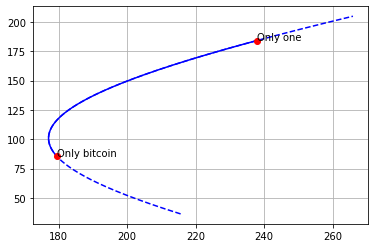

In [8]:
#efficient frontier
weight = np.linspace(start=0, stop=1, num=1000)
portofolio_returns = weight * expected_return_one + (1 - weight) * expected_return_bitcoin
portofolio_std = np.sqrt(weight**2*one_std**2+(1-weight)**2*bitcoin_std**2+2*corr_one_btc*one_std**2*bitcoin_std**2)

#inefficient portofolios
weight_inefficient = np.linspace(start=-0.5, stop=1.21, num=1000)
portofolio_returns_inefficient = weight_inefficient * expected_return_one + (1 - weight_inefficient) * expected_return_bitcoin
portofolio_std_inefficient = np.sqrt(weight_inefficient**2*one_std**2+(1-weight_inefficient)**2*bitcoin_std**2+2*corr_one_btc*one_std**2*bitcoin_std**2)

plt.plot(portofolio_std*100, portofolio_returns*100, linestyle='-', c='blue')
plt.plot(portofolio_std_inefficient*100, portofolio_returns_inefficient*100, linestyle='--', c='blue')

plt.annotate('Only one', (portofolio_std[-1]*100, portofolio_returns[-1]*100), xytext=(portofolio_std[-1]*100, portofolio_returns[-1]*100))
plt.annotate('Only bitcoin', (portofolio_std[0]*100, portofolio_returns[0]*100), xytext=(portofolio_std[0]*100, portofolio_returns[0]*100))
plt.plot([portofolio_std[-1]*100,portofolio_std[0]*100], [portofolio_returns[-1]*100,portofolio_returns[0]*100], 'ro')

plt.grid(True)

### Capital market line

In [14]:
SR = (portofolio_returns-risk_free_rate_harmony)/portofolio_std
optimal_SR = SR.max()
index_tan= np.argmax(SR)
x= np.linspace(start=0, stop=3, num=1000)
y = risk_free_rate_harmony + optimal_SR * x

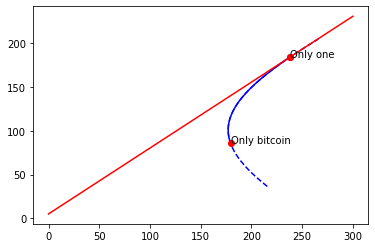

In [15]:
plt.plot(portofolio_std*100, portofolio_returns*100, linestyle='-', c='blue')
plt.plot(portofolio_std_inefficient*100, portofolio_returns_inefficient*100, linestyle='--', c='blue')
plt.plot(x*100, y*100, '-r', label='CML')

plt.annotate('Only one', (portofolio_std[-1]*100, portofolio_returns[-1]*100), xytext=(portofolio_std[-1]*100, portofolio_returns[-1]*100))
plt.annotate('Only bitcoin', (portofolio_std[0]*100, portofolio_returns[0]*100), xytext=(portofolio_std[0]*100, portofolio_returns[0]*100))
plt.plot([portofolio_std[-1]*100,portofolio_std[0]*100,portofolio_std[index_tan]*100], [portofolio_returns[-1]*100,portofolio_returns[0]*100,portofolio_returns[index_tan]*100], 'ro')